<a href="https://colab.research.google.com/github/axel-sirota/statistical-thikning-python/blob/main/Module2Demo_Mean_Median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Online Retail II Dataset

## Introduction
In this notebook, we will perform exploratory data analysis (EDA) on the Online Retail II Dataset. The dataset contains transactional data of an online retail store. Our goal is to analyze the data and derive insights from it.

## Data Loading and Preprocessing
We start by loading the dataset and performing data preprocessing steps.

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%writefile get_data.sh

wget -O retail.csv https://www.dropbox.com/scl/fi/3e467uu1fphdqhksw3pxl/online_retail_II_short.csv?rlkey=ordsuy8wacohms5g7bl084x5u&dl=0

Overwriting get_data.sh


In [ ]:
!bash get_data.sh

--2024-03-16 15:57:22--  https://www.dropbox.com/scl/fi/3e467uu1fphdqhksw3pxl/online_retail_II_short.csv?rlkey=ordsuy8wacohms5g7bl084x5u
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf0d6e8136eb345c7ce0f887e7b.dl.dropboxusercontent.com/cd/0/inline/CPNUtmjOY1xoLjQ2Tu0EWkh70vvRR1oWAbUZdVFnhRBuCE1zM4LCQLc-9NIos8kgUBRFaV1jgsK2Lcc5w52yNKNn5_ce__W9tAyzfjgNvYkKu81t87E3dJgeH5YdivU5EBlNSjMl7C13FP1w_vipYvT2/file# [following]
--2024-03-16 15:57:23--  https://ucf0d6e8136eb345c7ce0f887e7b.dl.dropboxusercontent.com/cd/0/inline/CPNUtmjOY1xoLjQ2Tu0EWkh70vvRR1oWAbUZdVFnhRBuCE1zM4LCQLc-9NIos8kgUBRFaV1jgsK2Lcc5w52yNKNn5_ce__W9tAyzfjgNvYkKu81t87E3dJgeH5YdivU5EBlNSjMl7C13FP1w_vipYvT2/file
Resolving ucf0d6e8136eb345c7ce0f887e7b.dl.dropboxusercontent.com (ucf0d6e8136eb345c7ce0f887e7b.dl.dropboxusercontent.com)... 162.12

In [ ]:
import csv
csv_file = 'retail.csv'
# data = np.genfromtxt(csv_file, delimiter=',', dtype=str)
data = []
with open(csv_file, 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
        data.append(row)

# Convert data to a NumPy array
data = np.array(data)


In [ ]:
data

array([['489434', '85048', '15CM CHRISTMAS GLASS BALL 20 LIGHTS', ...,
        '6.95', '13085', 'United Kingdom'],
       ['489434', '79323P', 'PINK CHERRY LIGHTS', ..., '6.75', '13085',
        'United Kingdom'],
       ['489434', '79323W', ' WHITE CHERRY LIGHTS', ..., '6.75', '13085',
        'United Kingdom'],
       ...,
       ['489856', '82613B', 'METAL SIGN,CUPCAKE SINGLE HOOK', ...,
        '2.57', '', 'United Kingdom'],
       ['489856', '82613C', 'METAL SIGN,CUPCAKE SINGLE HOOK', ...,
        '2.57', '', 'United Kingdom'],
       ['489856', '82613D', 'METAL SIGN CUPCAKE SINGLE HOOK', ...,
        '2.57', '', 'United Kingdom']], dtype='<U35')

In [ ]:
data = data[data[:, 3].astype(int) > 0]
data = data[~(data == 'NULL').any(axis=1)]

## Calculating Overall Mean and Median

Now we may ask ourselves a basic question: what is the price we sell our items in general? For that we will find out the mean and median Price.

In [ ]:
# Extract prices, countries, and quantities from the dataset
prices = data[:, 5].astype(float)
countries = data[:, 7]
quantities = data[:, 3].astype(int)

In [ ]:
# Calculate overall mean and median price using NumPy
mean_price = np.mean(prices)
median_price = np.median(prices)

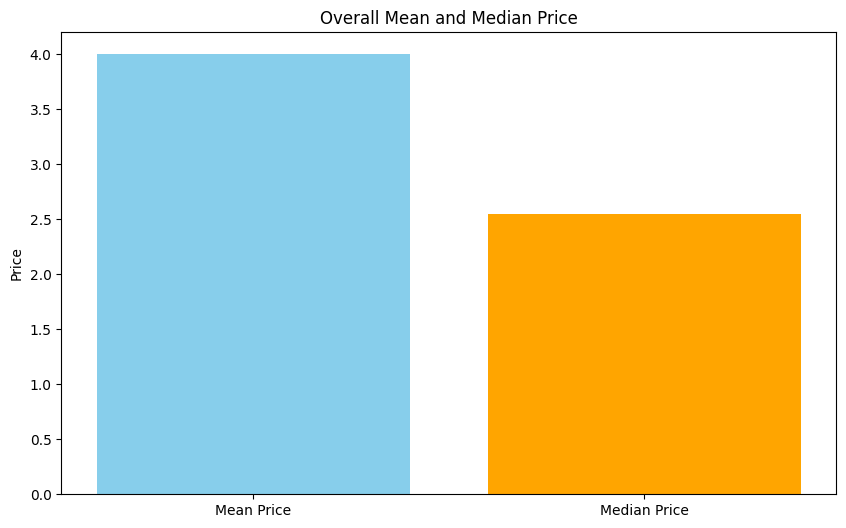

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Mean Price', 'Median Price'], [mean_price, median_price], color=['skyblue', 'orange'])
plt.title('Overall Mean and Median Price')
plt.ylabel('Price')
plt.show()

We can see as usual the median is a little less because of the extreme items

## Calculate Sales per Country

Finally, we want to find out in this dataset which is the most active country:

In [ ]:
# Calculate mean and median quantity per country using NumPy
unique_countries = np.unique(countries)
mean_quantity_per_country = np.zeros(len(unique_countries))
median_quantity_per_country = np.zeros(len(unique_countries))

for i, country in enumerate(unique_countries):
    country_quantities = quantities[countries == country]
    mean_quantity_per_country[i] = np.mean(country_quantities)
    median_quantity_per_country[i] = np.median(country_quantities)


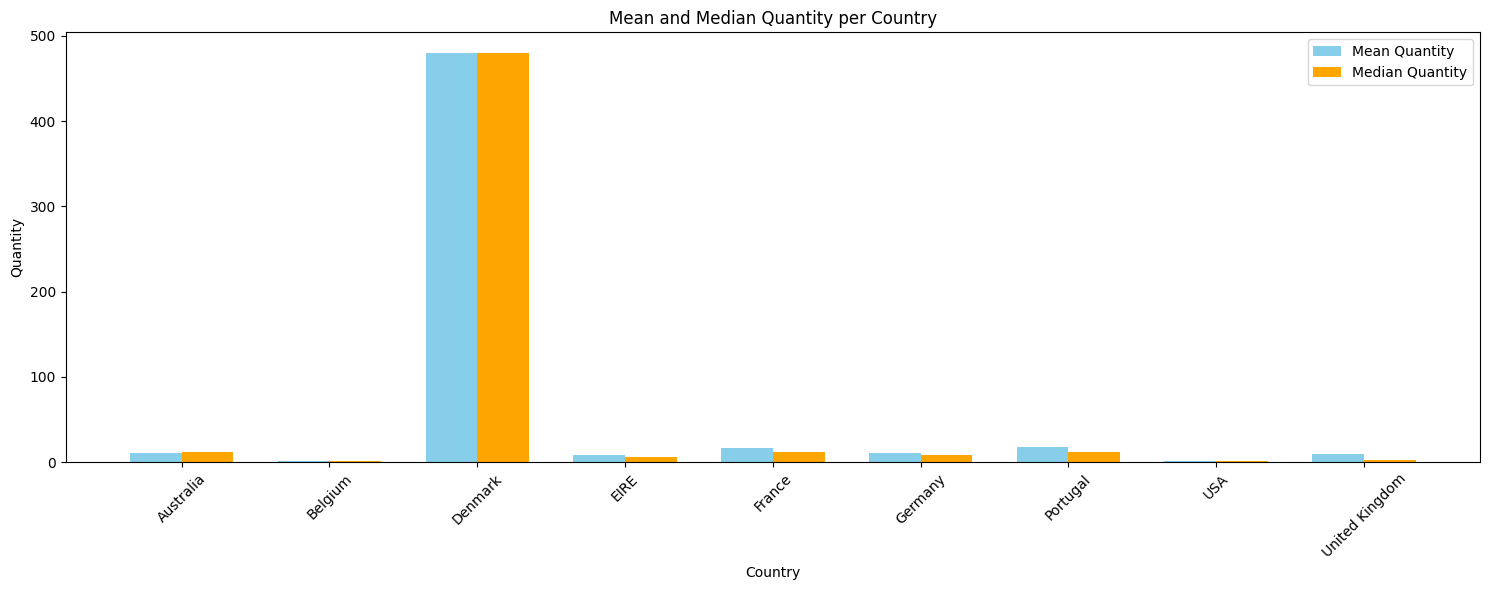

In [ ]:
bar_width = 0.35
index = np.arange(len(unique_countries))

plt.figure(figsize=(15, 6))
plt.bar(index, mean_quantity_per_country, bar_width, color='skyblue', label='Mean Quantity')
plt.bar(index + bar_width, median_quantity_per_country, bar_width, color='orange', label='Median Quantity')
plt.title('Mean and Median Quantity per Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(index + bar_width / 2, unique_countries, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we conducted exploratory data analysis on the Online Retail II Dataset. We visualized the overall mean and median price of transactions and examined the mean and median quantity of items per country. Further analysis and insights can be derived from the dataset for specific business needs.